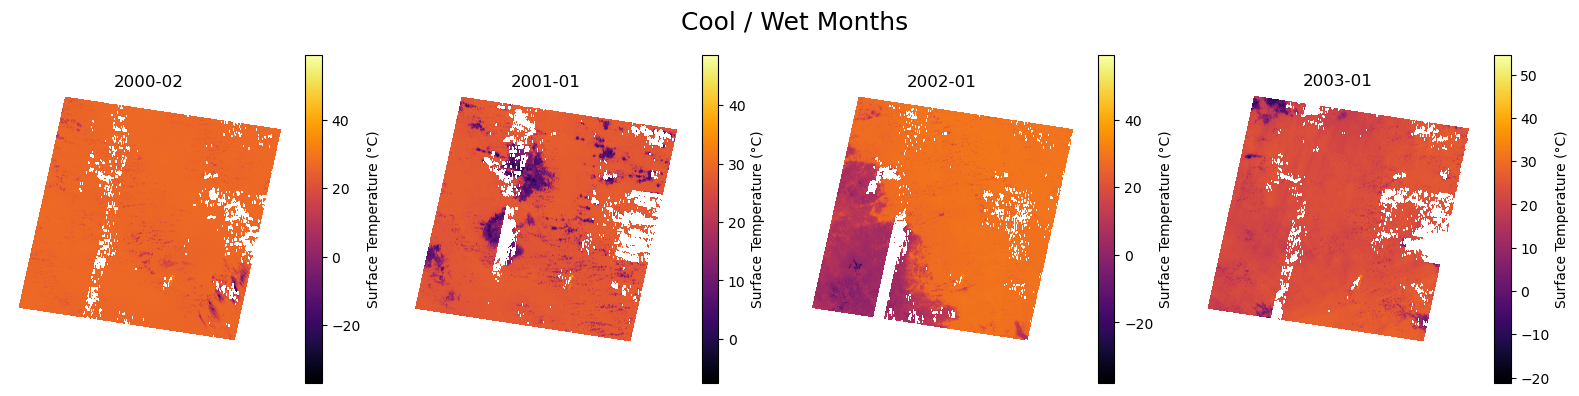

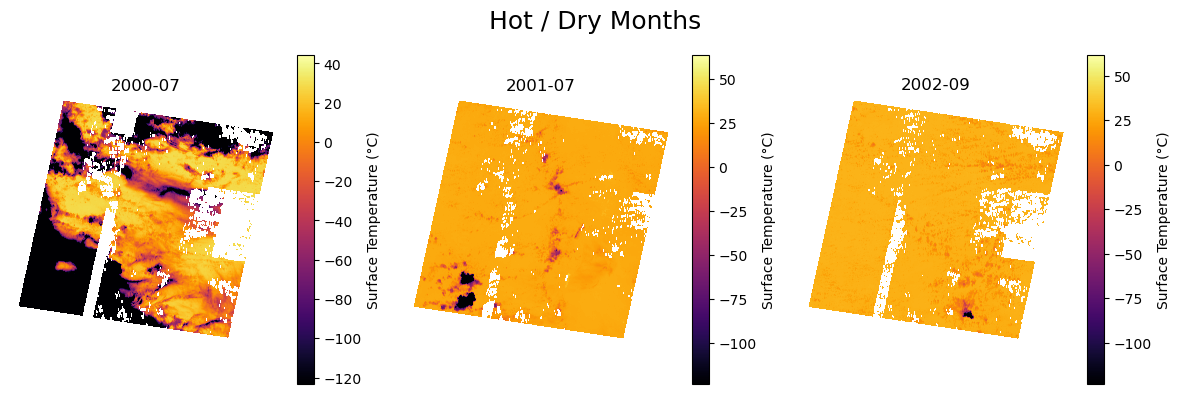

In [5]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


# File list and matching date labels for each scene

tif_files = ["LE07_L2SP_014051_20000214_20200918_02_T1_ST_B6.TIF", #Feb 14 2000
             "LE07_L2SP_014051_20000707_20200918_02_T1_ST_B6.TIF", #July 7 2000
             "LE07_L2SP_014051_20010131_20200917_02_T1_ST_B6.TIF", #Jan 31 2001'
             "LE07_L2SP_014051_20010726_20200917_02_T1_ST_B6.TIF", #July 26 2001
             "LE07_L2SP_014051_20020102_20200917_02_T1_ST_B6.TIF", #Jan 2 2002
             "LE07_L2SP_014051_20020915_20200916_02_T1_ST_B6.TIF", #Sep 15 2002
             "LE07_L2SP_014051_20030121_20200916_02_T1_ST_B6.TIF" #Jan 21 2003
            ]

dates = ["2000-02","2000-07","2001-01","2001-07","2002-01","2002-09","2003-01"]


 Landsat Level-2 Surface Temperature scale factors

MULT = 0.00341802     # scale factor
ADD  = 149.0          # additive offset before °C conversion

scenes = []


# Convert each scene and visualize

for tif, date in zip(tif_files, dates):
    with rasterio.open(tif) as src:
        DN = src.read(1).astype("float32")

    # Remove fill values
    DN[DN == 0] = np.nan

    # Convert DN → Kelvin → Celsius
    tempC = (DN * MULT + ADD) - 273.15

    scenes.append(tempC)

# New code seperating cool and dry month
cool_indices = [0, 2, 4, 6]   # Feb & Jan scenes
dry_indices  = [1, 3, 5]      # July & Sept scenes

# ------- COOL MONTHS -------
plt.figure(figsize=(16,4))
for i, idx in enumerate(cool_indices):
    plt.subplot(1, len(cool_indices), i+1)
    plt.imshow(scenes[idx], cmap="inferno")
    plt.title(dates[idx])
    plt.colorbar(label="Surface Temperature (°C)")
    plt.axis("off")
plt.suptitle("Cool / Wet Months", fontsize=18)
plt.tight_layout()
plt.show()

# ------- DRY MONTHS -------
plt.figure(figsize=(12,4))
for i, idx in enumerate(dry_indices):
    plt.subplot(1, len(dry_indices), i+1)
    plt.imshow(scenes[idx], cmap="inferno")
    plt.title(dates[idx])
    plt.colorbar(label="Surface Temperature (°C)")
    plt.axis("off")
plt.suptitle("Hot / Dry Months", fontsize=18)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

stats = []
for date, img in zip(dates, scenes):
    stats.append({
        "date": date,
        "mean": np.nanmean(img),
        "min": np.nanmin(img),
        "max": np.nanmax(img),
        "std": np.nanstd(img)
    })

df_stats = pd.DataFrame(stats)
print(df_stats)
df_stats.to_csv("sst_stats.csv", index=False)

      date       mean         min        max        std
0  2000-02  25.925924  -36.860596  58.902069   2.577750
1  2000-07 -36.555965 -123.148514  44.132782  59.754532
2  2001-01  25.289320   -7.523743  48.565979   5.189345
3  2001-07  24.625437 -123.148514  63.164337  14.762527
4  2002-01  22.723213  -37.797134  59.031952   9.661490
5  2002-09  27.525589 -123.148514  61.520264   6.476839
6  2003-01  22.733288  -21.178726  54.496246   3.624626


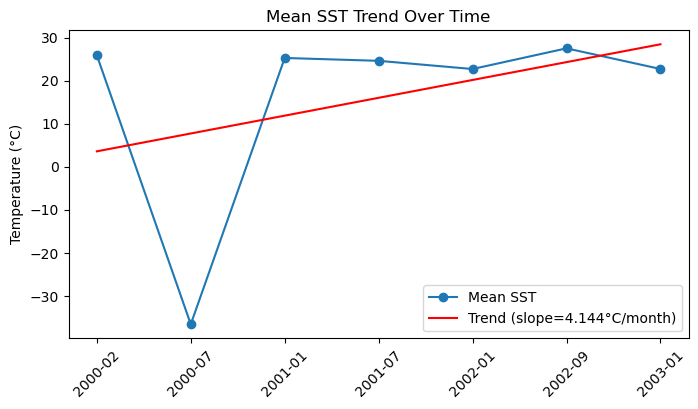

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

x = np.arange(len(df_stats))  # index 0→6
y = df_stats["mean"].values

slope, intercept, r, p, stderr = linregress(x, y)

plt.figure(figsize=(8,4))
plt.plot(df_stats["date"], y, marker="o", label="Mean SST")
plt.plot(df_stats["date"], intercept + slope*x, 'r', label=f"Trend (slope={slope:.3f}°C/month)")
plt.xticks(rotation=45)
plt.ylabel("Temperature (°C)")
plt.title("Mean SST Trend Over Time")
plt.legend()
plt.show()

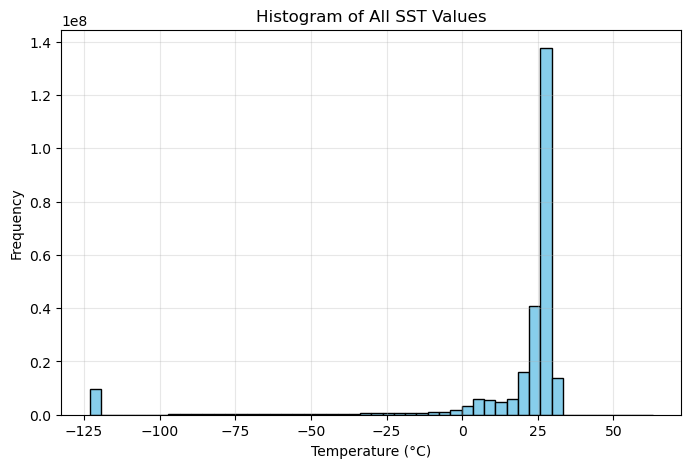

In [8]:
# Flatten all scenes into one array
all_vals = np.hstack([img.flatten() for img in scenes])
all_vals = all_vals[~np.isnan(all_vals)]   # remove NaN values

plt.figure(figsize=(8,5))
plt.hist(all_vals, bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Histogram of All SST Values")
plt.grid(alpha=0.3)
plt.show()

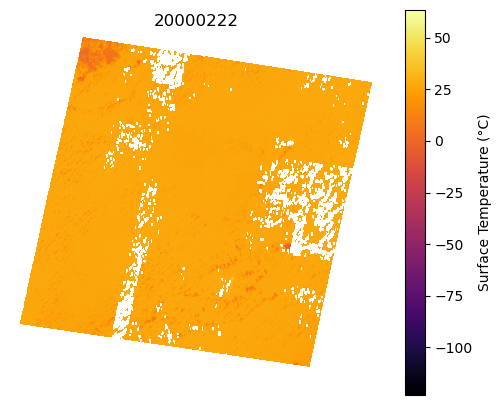

LT05_L2SP_014051_20000222_20231207_02_T2_ST_B6.TIF → min=-123.15°C, max=63.45°C


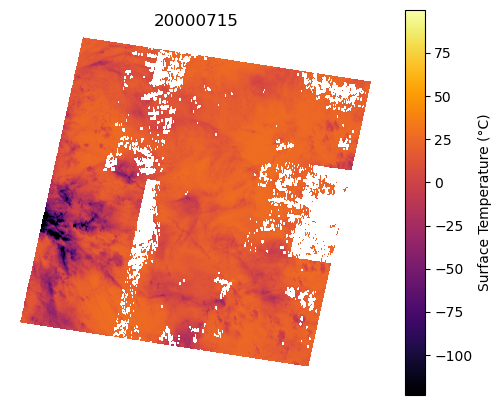

LT05_L2SP_014051_20000715_20231205_02_T1_ST_B6.TIF → min=-123.15°C, max=99.85°C


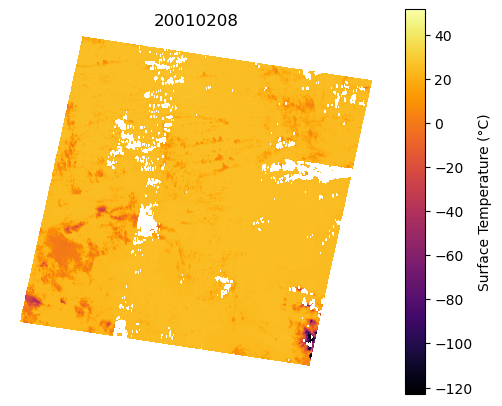

LT05_L2SP_014051_20010208_20231212_02_T2_ST_B6.TIF → min=-123.15°C, max=51.50°C


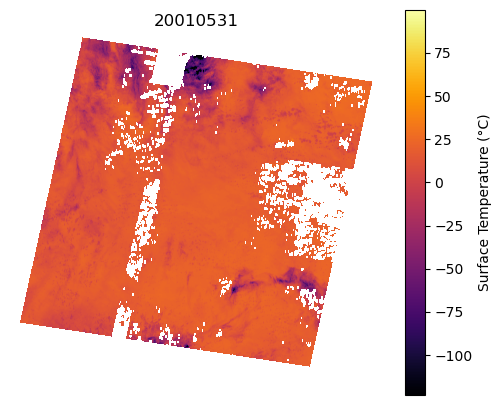

LT05_L2SP_014051_20010531_20231211_02_T2_ST_B6.TIF → min=-123.15°C, max=99.85°C


In [9]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# 1. Landsat 5 Level-2 ST files
tif_files = [
    "LT05_L2SP_014051_20000222_20231207_02_T2_ST_B6.TIF",
    "LT05_L2SP_014051_20000715_20231205_02_T1_ST_B6.TIF",
    "LT05_L2SP_014051_20010208_20231212_02_T2_ST_B6.TIF",
    "LT05_L2SP_014051_20010531_20231211_02_T2_ST_B6.TIF"
]

# 2. Conversion scale factors
MULT, ADD = 0.00341802, 149.0

# 3. Convert and preview each scene
for tif in tif_files:
    with rasterio.open(tif) as src:
        DN = src.read(1).astype("float32")
        DN[DN == 0] = np.nan  # remove fill
        tempC = (DN * MULT + ADD) - 273.15
        
        plt.figure(figsize=(6,5))
        plt.imshow(tempC, cmap="inferno")
        plt.title(tif.split("_")[3])  # shows acquisition date
        plt.colorbar(label="Surface Temperature (°C)")
        plt.axis("off")
        plt.show()

        print(f"{tif} → min={np.nanmin(tempC):.2f}°C, max={np.nanmax(tempC):.2f}°C")